# Calculating the Entropy as a Means to Test the Relative Buoyancy of Inflow and Outflow Gas in the CGM


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
import matplotlib
%run tags.ipynb
%run catalogue_particle_read.ipynb

h = 0.6727
m_sun = 1.989e33
k_boltzmann = 1.3806e-16

sim = ('Early', 'Organic', 'Late')
model = 'RECAL'
tag = '028_z000p000'

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.titlesize'] = 24
#matplotlib.rcParams.update({"text.usetex": True})

In [4]:
filenum = 0

p, q = 3, 3
all_coords = [[0 for x in range(p)] for y in range(q)]

view_box = [0.02, 0.02, 0.02]

centre = [28.326, 2.614, 21.519]
for i in range(0, 3):
    centre[i] = centre[i]/h

lower_bounds = [0, 0, 0]
for i in range(0, 3):
    lower_bounds[i] -= view_box[i]

upper_bounds = [50, 50, 50]
for i in range(0, 3):
    upper_bounds[i] += view_box[i]

print(lower_bounds)
print(upper_bounds)
#print(gas_nh)
    
r_200 = np.zeros(3)
temperatures = []

for i in range(0, 3):
    r_200[i] = catalogue_read("FOF", "Group_R_Crit200", data_location, tag=tag, sim=sim[i], cgs_units=True)[0]

print(r_200)    

gas_temps = [[0 for x in range(p)] for y in range(q)]
gas_nh = [[0 for x in range(p)] for y in range(q)]

for i in range(0, 3):
    if i == 0:
        centre = [28.6119, 3.0376902, 21.751993]
        for k in range(0, 3):
            centre[k] = centre[k]/h
    elif i == 1:
        centre = [28.326433, 2.613775, 21.518719]
        for k in range(0, 3):
            centre[k] = centre[k]/h
    elif i == 2:
        centre = [27.761707, 2.2246885, 21.483925]
        for k in range(0, 3):
            centre[k] = centre[k]/h
            
    for j in range(0, 16):
        filenum = j
        snapfile = os.path.join(data_location , model , sim[i] , f'snapshot_{tag}', f'snap_{tag}.{filenum}.hdf5')
        snapshot = pyread_eagle.EagleSnapshot(snapfile)

        boxsize = (snapshot.boxsize)/h
        
        gas_temps[i] = particle_read(0, "Temperature", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = sim[i], tag = tag, phys_units = False, cgs_units = True)
        gas_nh[i] = particle_read(0, "Density", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = sim[i], tag = tag, phys_units = False, cgs_units = True)
        gas_nh[i] /= (1.6726e-24/0.76)

#print(min(gas_temps[0]), min(gas_temps[1]), min(gas_temps[2]))
#print(max(gas_temps[0]), max(gas_temps[1]), max(gas_temps[2]))
#print(len(gas_temps[0]), len(gas_temps[1]), len(gas_temps[2]))

print(min(gas_nh[0]), min(gas_nh[1]), min(gas_nh[2]))
print(max(gas_nh[0]), max(gas_nh[1]), max(gas_nh[2]))
print(gas_nh)

[-0.02, -0.02, -0.02]
[50.02, 50.02, 50.02]
[9.89533038e+23 9.63053233e+23 9.32619960e+23]
8.971216311229336e-13 2.9490147172594063e-12 1.736308023588225e-12
5.563783738008988 113.57312438120212 232.61528036052354
[array([4.03025951e-12, 3.01788597e-12, 2.16669945e-12, ...,
       1.40125445e-11, 9.14353588e-12, 3.94284187e-12]), array([7.57331241e-12, 1.32195815e-11, 1.37579495e-11, ...,
       1.10126041e-10, 8.32500888e-11, 2.90814284e-11]), array([1.98180751e-11, 1.27452574e-10, 4.13779585e-11, ...,
       2.05198468e-11, 2.42651603e-11, 4.73397889e-11])]


In [5]:
centre = [28.6119, 3.0376902, 21.751993]
for i in range(0, 3):
    centre[i] = centre[i]/h
    
sim = 'Early'
for j in range(0, 16):
    filenum = j
    snapfile = os.path.join(data_location , model, sim, f'snapshot_{tag}', f'snap_{tag}.{filenum}.hdf5')
    snapshot = pyread_eagle.EagleSnapshot(snapfile)

    coords_early = particle_read(0, "Coordinates", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = 'Early', tag = tag)


centre = [28.326433, 2.613775, 21.518719]
for i in range(0, 3):
    centre[i] = centre[i]/h    
    
sim = 'Organic'
for j in range(0, 16):
    filenum = j
    snapfile = os.path.join(data_location , model, sim, f'snapshot_{tag}', f'snap_{tag}.{filenum}.hdf5')
    snapshot = pyread_eagle.EagleSnapshot(snapfile)
    
    coords_organic = particle_read(0, "Coordinates", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = 'Organic', tag = tag)

    
centre = [27.761707, 2.2246885, 21.483925]
for i in range(0, 3):
    centre[i] = centre[i]/h

sim = 'Late'
for j in range(0, 16):
    filenum = j
    snapfile = os.path.join(data_location , model, sim, f'snapshot_{tag}', f'snap_{tag}.{filenum}.hdf5')
    snapshot = pyread_eagle.EagleSnapshot(snapfile)

    coords_late = particle_read(0, "Coordinates", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = 'Late', tag = tag)
    
    
print(coords_early)
print(coords_organic)
print(coords_late)

[[ 0.33388907  7.8633233  24.82253891]
 [49.43178572 17.88530284  0.06328966]
 [48.12143513 14.77186109  1.08432343]
 ...
 [ 3.64245362  8.29669221 38.68842621]
 [ 3.44766499  8.34722682 39.89559179]
 [ 1.01392355  9.64972199 44.36408008]]
[[37.24937527  5.16186198 24.05231723]
 [37.03287407  5.3866539  24.75543941]
 [37.64082214  5.55117977 25.03123374]
 ...
 [39.96962403 49.68953041 35.28955708]
 [39.77366135 49.91286041 35.80027505]
 [36.25767633 50.31230436 31.08555841]]
[[34.14274061  4.21595634 25.1610776 ]
 [36.89286445  4.29954783 25.11663387]
 [35.66493163  3.84559749 24.58874277]
 ...
 [37.24509274 49.18259798 29.92588911]
 [37.70419504 49.17028823 29.47151998]
 [37.55522781 49.94049053 29.50671434]]


In [6]:
"Section for reading in the necessary values to determine the entropy in the GM-Early case."

centre = [28.6119, 3.0376902, 21.751993] #re-centre the galaxy for the GM-Early case
for i in range(0, 3):
    centre[i] = centre[i]/h

galaxy_centre = centre

radial_dist_early = np.sqrt((galaxy_centre[0] - coords_early[:,0])**2 + (galaxy_centre[1] - coords_early[:,1])**2 + (galaxy_centre[2] - coords_early[:,2])**2) #array full of vector distances to particles from the centre
                            
for j in range(0, 16):
    filenum = j
    snapfile = os.path.join(data_location , model, 'Early', f'snapshot_{tag}', f'snap_{tag}.{filenum}.hdf5')
    snapshot = pyread_eagle.EagleSnapshot(snapfile)
    sfr_early = particle_read(0, "StarFormationRate", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = 'Early', tag = tag, phys_units = False, cgs_units = True) #read in the star formation rate for GM-Early

count = 0
for i in range(0, len(sfr_early)): #create a counter to determine the number of non-star-forming particles 
    if sfr_early[i] == 0:
        count += 1
        
print(count)   
entropy_test = np.ones(len(sfr_early))
entropy_test = gas_temps[0]/(gas_nh[0]**(2/3))
entropy_test = 1.3806e-16*entropy_test
entropy_test = entropy_test/1.602e-9
entropy_early = np.ones(count) #define the GM-Early entropy array based on the number of non-star-forming particles
radial_temporary_early = np.ones(count)
gas_temporary_temps_early = np.ones(count)
gas_temporary_density_early = np.ones(count)
test_sfr_early = np.zeros(count)
count = -1
mask = np.where((sfr_early==0)&(gas_nh[0] < 0.1)&(radial_dist_early <= (r_200[0]/3.085678e24)))
masked_entropy_early = entropy_test[mask]


for i in range(0, len(sfr_early)): #loop to find the GM-Early entropy per non-star-forming particle 
    
    if sfr_early[i] == 0 and gas_nh[0][i] < 0.1:
        count += 1
#        test_sfr_early[count] = sfr_early[i]
        radial_temporary_early[count] = radial_dist_early[i]
        gas_temporary_temps_early[count] = gas_temps[0][i]
        gas_temporary_density_early[count] = gas_nh[0][i]
        entropy_early[count] = gas_temps[0][i]/(gas_nh[0][i]**(2/3))
        entropy_early[count] = 1.3806e-16*entropy_early[count]
        entropy_early[count] = entropy_early[count]/1.602e-9

entropy_early_plot = [] #define empty arrays to fill with relevant data that is within r_200
radial_early_plot = []
gas_density_early = []
gas_temps_early = []

for i in range(0, len(radial_temporary_early)):
    if radial_temporary_early[i] <= (r_200[0]/3.085678e24):
        entropy_early_plot.append(entropy_early[i])
        radial_early_plot.append(radial_temporary_early[i])
        gas_density_early.append(gas_temporary_density_early[i])
        gas_temps_early.append(gas_temporary_temps_early[i])
        

print(len(masked_entropy_early))
print(min(masked_entropy_early))
print(max(masked_entropy_early))
print(len(entropy_early_plot))
print(min(entropy_early_plot))
print(max(entropy_early_plot))

radial_early_plot = [x * 1000 for x in radial_early_plot] #convert to Kpc
        
        
print("checkpoint 1")

"Section for reading in the necessary values to determine the entropy in the Organic case."

centre = [28.326433, 2.613775, 21.518719]
for i in range(0, 3):
    centre[i] = centre[i]/h
    
galaxy_centre = centre
radial_dist_organic = np.sqrt((galaxy_centre[0] - coords_organic[:,0])**2 + (galaxy_centre[1] - coords_organic[:,1])**2 + (galaxy_centre[2] - coords_organic[:,2])**2)

for j in range(0, 16):
    filenum = j
    snapfile = os.path.join(data_location , model, 'Organic', f'snapshot_{tag}', f'snap_{tag}.{filenum}.hdf5')
    snapshot = pyread_eagle.EagleSnapshot(snapfile)
    sfr_organic = particle_read(0, "StarFormationRate", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = 'Organic', tag = tag, phys_units = False, cgs_units = True)
    
count = 0
for i in range(0, len(sfr_organic)):
    if sfr_organic[i] == 0:
        count += 1
        
print(count)        
entropy_organic = np.ones(count)
radial_temporary_organic = np.ones(count)
gas_temporary_temps_organic = np.ones(count)
gas_temporary_density_organic = np.ones(count)
test_sfr_organic = np.zeros(count)
count = -1

for i in range(0, len(sfr_organic)):
    
    if sfr_organic[i] == 0 and gas_nh[1][i] < 0.1:
        count += 1
        test_sfr_organic[count] = sfr_organic[i]
        radial_temporary_organic[count] = radial_dist_organic[i]
        gas_temporary_temps_organic[count] = gas_temps[1][i]
        gas_temporary_density_organic[count] = gas_nh[1][i]
        entropy_organic[count] = gas_temps[1][i]/(gas_nh[1][i]**(2/3))
        entropy_organic[count] = 1.3806e-16*entropy_organic[count]
        entropy_organic[count] = entropy_organic[count]/1.602e-9
        

entropy_organic_plot = []
radial_organic_plot = []
gas_density_organic = []
gas_temps_organic = []

for i in range(0, len(radial_temporary_organic)):
    if radial_temporary_organic[i] <= (r_200[1]/3.085678e24):
        entropy_organic_plot.append(entropy_organic[i])
        radial_organic_plot.append(radial_temporary_organic[i])
        gas_density_organic.append(gas_temporary_density_organic[i])
        gas_temps_organic.append(gas_temporary_temps_organic[i])
        
radial_organic_plot = [x * 1000 for x in radial_organic_plot]
        
print("checkpoint 2")

"Section for reading in the necessary values to determine the entropy in the GM-Late case."

centre = [27.761707, 2.2246885, 21.483925]
for i in range(0, 3):
    centre[i] = centre[i]/h
    
galaxy_centre = centre
radial_dist_late = np.sqrt((galaxy_centre[0] - coords_late[:,0])**2 + (galaxy_centre[1] - coords_late[:,1])**2 + (galaxy_centre[2] - coords_late[:,2])**2)

for j in range(0, 16):
    filenum = j
    snapfile = os.path.join(data_location , model, 'Late', f'snapshot_{tag}', f'snap_{tag}.{filenum}.hdf5')
    snapshot = pyread_eagle.EagleSnapshot(snapfile)
    sfr_late = particle_read(0, "StarFormationRate", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = 'Late', tag = tag, phys_units = False, cgs_units = True)
        

count = 0
for i in range(0, len(sfr_late)):
    if sfr_late[i] == 0:
        count += 1
        
print(count)        
entropy_late = np.ones(count)
radial_temporary_late = np.ones(count)
gas_temporary_temps_late = np.ones(count)
gas_temporary_density_late = np.ones(count)
test_sfr_late = np.zeros(count)
count = -1

for i in range(0, len(sfr_late)):
    
    if sfr_late[i] == 0 and gas_nh[2][i] < 0.1:
        count += 1
        test_sfr_late[count] = sfr_late[i]
        radial_temporary_late[count] = radial_dist_late[i]
        gas_temporary_temps_late[count] = gas_temps[2][i]
        gas_temporary_density_late[count] = gas_nh[2][i]
        entropy_late[count] = gas_temporary_temps_late[count]/(gas_temporary_density_late[count]**(2/3))
        entropy_late[count] = 1.3806e-16*entropy_late[count]
        entropy_late[count] = entropy_late[count]/1.602e-9
        

entropy_late_plot = []
radial_late_plot = []
gas_density_late = []
gas_temps_late = []

for i in range(0, len(radial_temporary_late)):
    if radial_temporary_late[i] <= (r_200[2]/3.085678e24):
        entropy_late_plot.append(entropy_late[i])
        radial_late_plot.append(radial_temporary_late[i])
        gas_density_late.append(gas_temporary_density_late[i])
        gas_temps_late.append(gas_temporary_temps_late[i])
        
radial_late_plot = [x * 1000 for x in radial_late_plot]

print("checkpoint 3")

                


2163527
73099
0.001858043817637551
1208.6589792945942
73099
0.001858043817637551
1208.6589792945942
checkpoint 1
2110514
checkpoint 2
2094016
checkpoint 3


112.73347168847482
67.38091625309578
48.36814750824466


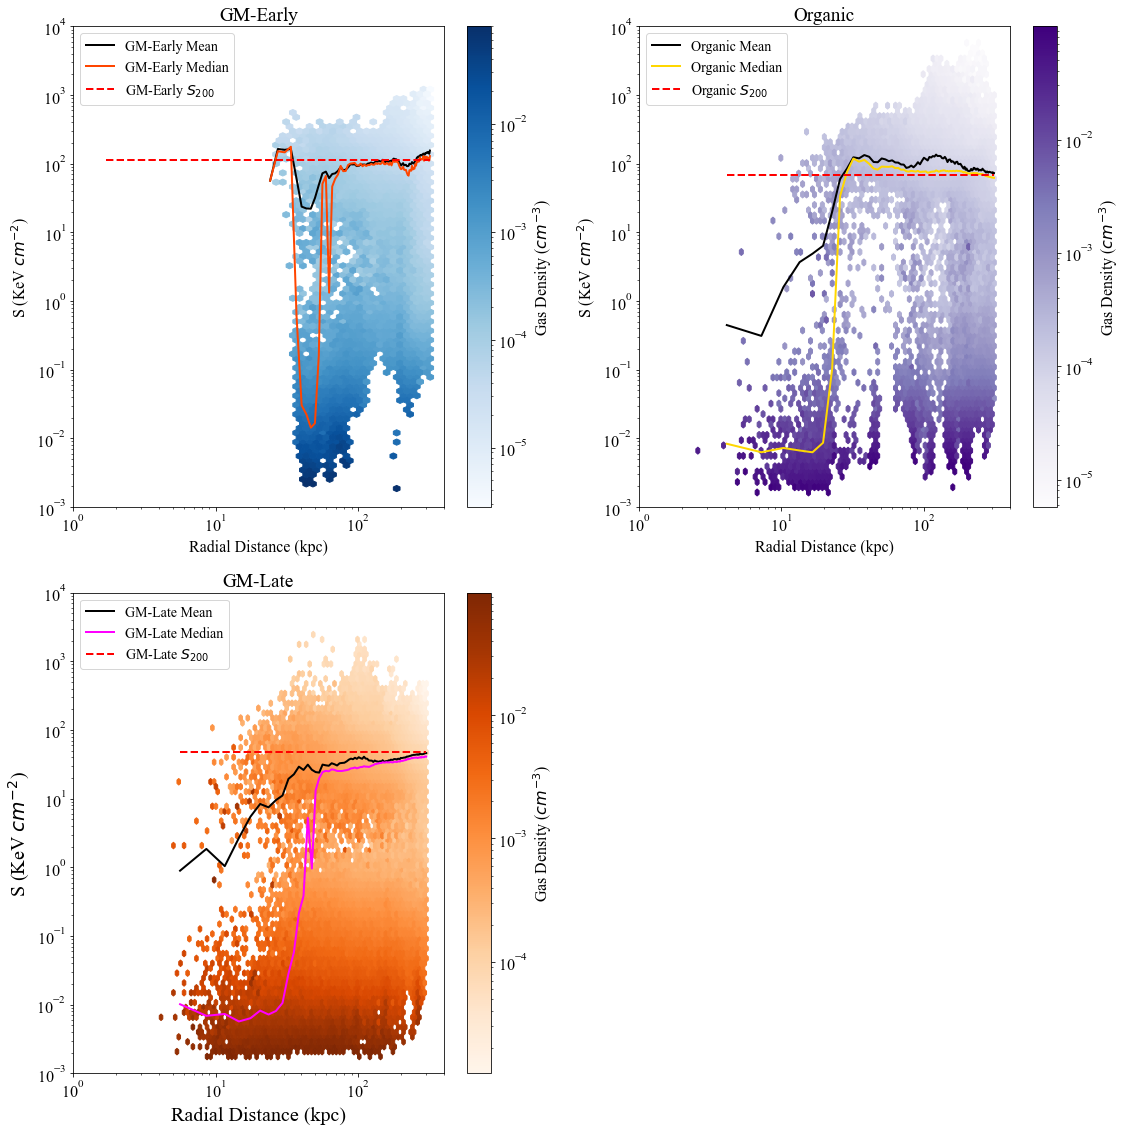

In [10]:
from scipy.stats import binned_statistic

num_bins = 100

"Read in values in order to calculate T_200 and S_200 for each halo"

m_200_early = catalogue_read("FOF", "Group_M_Crit200", data_location, tag=tag, sim=sim[0], cgs_units=True)[0]
v_200_early = np.sqrt((6.672e-8 * m_200_early) / r_200[0])
m_gas_early = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Early', cgs_units=True)[0][0]
m_dm_early = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Early', cgs_units=True)[0][1]
m_star_early = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Early', cgs_units=True)[0][4]
m_bh_early = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Early', cgs_units=True)[0][5]

bm_fraction_early = (m_gas_early+m_star_early)/(m_gas_early+m_dm_early+m_star_early+m_bh_early)
rho_c_early = 3*m_200_early/(4*np.pi*(r_200[0])**3)
ne_200_early = rho_c_early*bm_fraction_early/1.6726e-24

temp_200_early = (1/3)*(((2/3)*1.6726e-24)/1.3806e-16) * v_200_early**2

s_200_early = temp_200_early/((ne_200_early)**(2/3))
s_200_early = s_200_early * 1.3806e-16
s_200_early = s_200_early / 1.602e-9
s_200_early_plot = np.ones(num_bins)
s_200_early_plot = [x * s_200_early for x in s_200_early_plot]
print(s_200_early)

m_200_organic = catalogue_read("FOF", "Group_M_Crit200", data_location, tag=tag, sim=sim[1], cgs_units=True)[0]
v_200_organic = np.sqrt((6.672e-8 * m_200_organic) / r_200[1])
m_gas_organic = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Organic', cgs_units=True)[0][0]
m_dm_organic = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Organic', cgs_units=True)[0][1]
m_star_organic = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Organic', cgs_units=True)[0][4]
m_bh_organic = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Organic', cgs_units=True)[0][5]

bm_fraction_organic = (m_gas_organic+m_star_organic)/(m_gas_organic+m_dm_organic+m_star_organic+m_bh_organic)
rho_c_organic = 3*m_200_organic/(4*np.pi*(r_200[1])**3)
ne_200_organic = rho_c_organic*bm_fraction_organic/1.6726e-24

temp_200_organic = (1/3)*(((2/3)*1.6726e-24)/1.3806e-16) * v_200_organic**2

s_200_organic = temp_200_organic/(ne_200_organic**(2/3))
s_200_organic = s_200_organic * 1.3806e-16
s_200_organic = s_200_organic / 1.602e-9 
s_200_organic_plot = np.ones(num_bins)
s_200_organic_plot = [x * s_200_organic for x in s_200_organic_plot]

print(s_200_organic)

m_200_late = catalogue_read("FOF", "Group_M_Crit200", data_location, tag=tag, sim=sim[2], cgs_units=True)[0]
v_200_late = np.sqrt((6.672e-8 * m_200_late) / r_200[2])
m_gas_late = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Late', cgs_units=True)[0][0]
m_dm_late = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Late', cgs_units=True)[0][1]
m_star_late = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Late', cgs_units=True)[0][4]
m_bh_late = catalogue_read("Subhalo", "ApertureMeasurements/Mass/100kpc", data_location, tag=tag, sim='Late', cgs_units=True)[0][5]

bm_fraction_late = (m_gas_late+m_star_late)/(m_gas_late+m_dm_late+m_star_late+m_bh_late)
rho_c_late = 3*m_200_late/(4*np.pi*(r_200[2])**3)
ne_200_late = rho_c_late*bm_fraction_late/1.6726e-24

temp_200_late = (1/3)*(((2/3)*1.6726e-24)/1.3806e-16) * v_200_late**2

s_200_late = temp_200_late/(ne_200_late**(2/3))
s_200_late = s_200_late * 1.3806e-16
s_200_late = s_200_late / 1.602e-9
s_200_late_plot = np.ones(num_bins)
s_200_late_plot = [x * s_200_late for x in s_200_late_plot]

print(s_200_late)


"Section for finding the median and mean values per bin of the GM-Early scatter plot"

# Get the statistics we want in 20 equally spaced bins in log(radius_early)
# The module also gives us the edges of the bins
mean, bin_edges, bin_number = binned_statistic(radial_early_plot, entropy_early_plot, statistic='mean', bins=num_bins)
median, bin_edges, bin_number = binned_statistic(radial_early_plot, entropy_early_plot, statistic='median', bins=num_bins)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.


fig = plt.figure(figsize=(16, 16))

ax = plt.subplot(2,2,1)
hexplot = ax.hexbin(radial_early_plot, entropy_early_plot, C = gas_density_early, reduce_C_function=np.mean, gridsize=75, bins = 'log', xscale = 'log', yscale = 'log', cmap='Blues', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Gas Density ($cm^{-3}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='GM-Early Mean')     # Plot the mean 
ax.plot(bin_centres,median,c='orangered',lw=2,ls='-',label='GM-Early Median')  # Plot the median 
ax.plot(bin_centres, s_200_early_plot, c='red',lw=2,ls='--',label='GM-Early $S_{200}$')
plt.title('GM-Early')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("S (KeV $cm^{-2}$)")
plt.xlim([1, 4e2])
plt.ylim([1e-3, 1e4])
plt.xscale('log')
plt.yscale('log')

ax.legend(loc='upper left',prop={'size': 14})


"Section for finding the median and mean values per bin of the Organic scatter plot"

mean, bin_edges, bin_number = binned_statistic(radial_organic_plot, entropy_organic_plot, statistic='mean', bins=num_bins)
median, bin_edges, bin_number = binned_statistic(radial_organic_plot, entropy_organic_plot, statistic='median', bins=num_bins)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.
ax = plt.subplot(2,2,2)
hexplot = ax.hexbin(radial_organic_plot, entropy_organic_plot, C = gas_density_organic, reduce_C_function=np.mean, gridsize=75, bins = 'log', xscale = 'log', yscale = 'log', cmap='Purples', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Gas Density ($cm^{-3}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='Organic Mean')     # Plot the mean 
ax.plot(bin_centres,median,c='gold',lw=2,ls='-',label='Organic Median')  # Plot the median
ax.plot(bin_centres, s_200_organic_plot, c='red',lw=2,ls='--',label='Organic $S_{200}$')
plt.title('Organic')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("S (KeV $cm^{-2}$)")
plt.xlim([1, 4e2])
plt.ylim([1e-3, 1e4])
plt.xscale('log')
plt.yscale('log')

ax.legend(loc='upper left',prop={'size': 14})


"Section for finding the median and mean values per bin of the GM-Late scatter plot"

mean, bin_edges, bin_number = binned_statistic(radial_late_plot, entropy_late_plot, statistic='mean', bins=num_bins)
median, bin_edges, bin_number = binned_statistic(radial_late_plot, entropy_late_plot, statistic='median', bins=num_bins)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.
ax = plt.subplot(2,2,3)
hexplot = ax.hexbin(radial_late_plot, entropy_late_plot, C = gas_density_late, reduce_C_function=np.mean, gridsize=75, bins = 'log', xscale = 'log', yscale = 'log', cmap='Oranges', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Gas Density ($cm^{-3}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='GM-Late Mean')     # Plot the mean 
ax.plot(bin_centres,median,c='fuchsia',lw=2,ls='-',label='GM-Late Median')  # Plot the median 
ax.plot(bin_centres, s_200_late_plot, c='red',lw=2,ls='--',label='GM-Late $S_{200}$')
plt.title('GM-Late')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("S (KeV $cm^{-2}$)")
plt.xlim([1, 4e2])
plt.ylim([1e-3, 1e4])
plt.xscale('log')
plt.yscale('log')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

ax.legend(loc='upper left',prop={'size': 14})
plt.tight_layout()
#plt.savefig('Binned_Entropy_Radius_Density_Weighted.png')
plt.show()

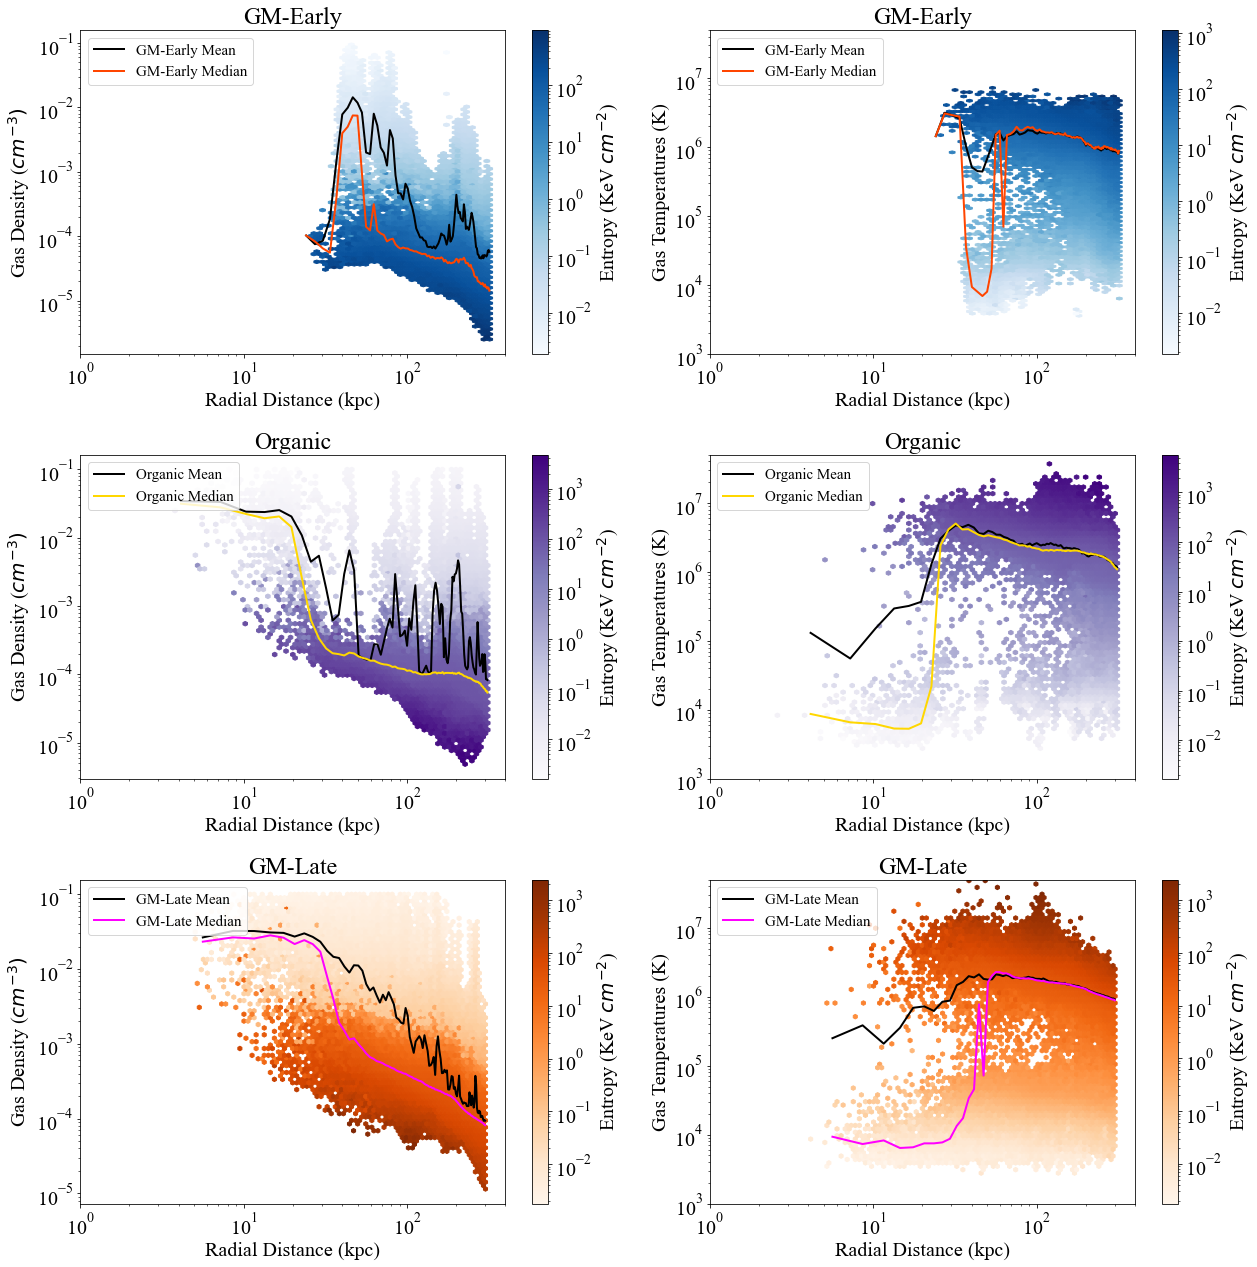

In [33]:
mean, bin_edges, bin_number = binned_statistic(radial_early_plot, gas_density_early, statistic='mean', bins=100)     #Find the mean values of the binned GM-Early scatter plot
median, bin_edges, bin_number = binned_statistic(radial_early_plot, gas_density_early, statistic='median', bins=100) #Find the median values of the binned GM-Early scatter plot

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.

fig = plt.figure(figsize=(18, 18))

ax = plt.subplot(3,2,1)
hexplot = ax.hexbin(radial_early_plot, gas_density_early, C = entropy_early_plot, reduce_C_function=np.mean, gridsize=100, bins = 'log', xscale = 'log', yscale = 'log', cmap='Blues', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='GM-Early Mean')     # Plot the mean with a solid line
ax.plot(bin_centres,median,c='orangered',lw=2,ls='-',label='GM-Early Median')  # Plot the median with a dashed line
plt.title('GM-Early')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("Gas Density ($cm^{-3})$")
plt.xlim([1, 4e2])
plt.xscale('log')
plt.yscale('log')
ax.legend(loc='upper left',prop={'size': 15})

mean, bin_edges, bin_number = binned_statistic(radial_early_plot, gas_temps_early, statistic='mean', bins=100)
median, bin_edges, bin_number = binned_statistic(radial_early_plot, gas_temps_early, statistic='median', bins=100)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.

ax = plt.subplot(3,2,2)
hexplot = ax.hexbin(radial_early_plot, gas_temps_early, C = entropy_early_plot, reduce_C_function=np.mean, gridsize=100, bins = 'log', xscale = 'log', yscale = 'log', cmap='Blues', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='GM-Early Mean')     # Plot the mean with a solid line
ax.plot(bin_centres,median,c='orangered',lw=2,ls='-',label='GM-Early Median')  # Plot the median with a dashed line
plt.title('GM-Early')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("Gas Temperatures (K)")
plt.xlim([1, 4e2])
plt.ylim([1e3, 5e7])
plt.xscale('log')
plt.yscale('log')
ax.legend(loc='upper left',prop={'size': 15})

mean, bin_edges, bin_number = binned_statistic(radial_organic_plot, gas_density_organic, statistic='mean', bins=100)
median, bin_edges, bin_number = binned_statistic(radial_organic_plot, gas_density_organic, statistic='median', bins=100)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.

ax = plt.subplot(3,2,3)
hexplot = ax.hexbin(radial_organic_plot, gas_density_organic, C = entropy_organic_plot, reduce_C_function=np.mean, gridsize=75, bins = 'log', xscale = 'log', yscale = 'log', cmap='Purples', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='Organic Mean')     # Plot the mean with a solid line
ax.plot(bin_centres,median,c='gold',lw=2,ls='-',label='Organic Median')  # Plot the median with a dashed line
plt.title('Organic')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("Gas Density ($cm^{-3})$")
plt.xlim([1, 4e2])
plt.xscale('log')
plt.yscale('log')
ax.legend(loc='upper left',prop={'size': 15})

mean, bin_edges, bin_number = binned_statistic(radial_organic_plot, gas_temps_organic, statistic='mean', bins=100)
median, bin_edges, bin_number = binned_statistic(radial_organic_plot, gas_temps_organic, statistic='median', bins=100)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.

ax = plt.subplot(3,2,4)
hexplot = ax.hexbin(radial_organic_plot, gas_temps_organic, C = entropy_organic_plot, reduce_C_function=np.mean, gridsize=75, bins = 'log', xscale = 'log', yscale = 'log', cmap='Purples', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='Organic Mean')     # Plot the mean with a solid line
ax.plot(bin_centres,median,c='gold',lw=2,ls='-',label='Organic Median')  # Plot the median with a dashed line
plt.title('Organic')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("Gas Temperatures (K)")
plt.xlim([1, 4e2])
plt.ylim([1e3, 5e7])
plt.xscale('log')
plt.yscale('log')
ax.legend(loc='upper left',prop={'size': 15})

mean, bin_edges, bin_number = binned_statistic(radial_late_plot, gas_density_late, statistic='mean', bins=100)
median, bin_edges, bin_number = binned_statistic(radial_late_plot, gas_density_late, statistic='median', bins=100)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.

ax = plt.subplot(3,2,5)
hexplot = ax.hexbin(radial_late_plot, gas_density_late, C = entropy_late_plot, reduce_C_function=np.mean, gridsize=75, bins = 'log', xscale = 'log', yscale = 'log', cmap='Oranges', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='GM-Late Mean')     # Plot the mean with a solid line
ax.plot(bin_centres,median,c='fuchsia',lw=2,ls='-',label='GM-Late Median')  # Plot the median with a dashed line
plt.title('GM-Late')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("Gas Density ($cm^{-3})$")
plt.xlim([1, 4e2])
plt.xscale('log')
plt.yscale('log')
ax.legend(loc='upper left',prop={'size': 15})

mean, bin_edges, bin_number = binned_statistic(radial_late_plot, gas_temps_late, statistic='mean', bins=100)
median, bin_edges, bin_number = binned_statistic(radial_late_plot, gas_temps_late, statistic='median', bins=100)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.

ax = plt.subplot(3,2,6)
hexplot = ax.hexbin(radial_late_plot, gas_temps_late, C = entropy_late_plot, reduce_C_function=np.mean, gridsize=75, bins = 'log', xscale = 'log', yscale = 'log', cmap='Oranges', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='GM-Late Mean')     # Plot the mean with a solid line
ax.plot(bin_centres,median,c='fuchsia',lw=2,ls='-',label='GM-Late Median')  # Plot the median with a dashed line
plt.title('GM-Late')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("Gas Temperatures (K)")
plt.xlim([1, 4e2])
plt.ylim([1e3, 5e7])
plt.xscale('log')
plt.yscale('log')
ax.legend(loc='upper left',prop={'size': 15})
fig.tight_layout()
plt.savefig('binned_nh_temp_radius_entropy_weighted.png')
plt.show()

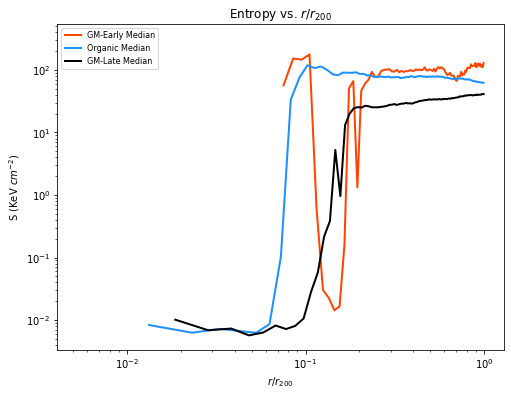

In [252]:
from scipy.stats import binned_statistic

# Get the statistics we want in 20 equally spaced bins in log(radius_early)
# The module also gives us the edges of the bin
normalised_radius_early = radial_early_plot/(r_200[0]/3.085678e21)
median_early, bin_edges_early, bin_number_early = binned_statistic(normalised_radius_early, entropy_early_plot, statistic='median', bins=100)

# Find the centres of the bins
bin_centres_early = (bin_edges_early[:-1]+bin_edges_early[1:])/2.

normalised_radius_organic = radial_organic_plot/(r_200[1]/3.085678e21)
median_organic, bin_edges_organic, bin_number_organic = binned_statistic(normalised_radius_organic, entropy_organic_plot, statistic='median', bins=100)

bin_centres_organic = (bin_edges_organic[:-1]+bin_edges_organic[1:])/2.

normalised_radius_late = radial_late_plot/(r_200[2]/3.085678e21)
median_late, bin_edges_late, bin_number_late = binned_statistic(normalised_radius_late, entropy_late_plot, statistic='median', bins=100)

bin_centres_late = (bin_edges_late[:-1]+bin_edges_late[1:])/2.

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(bin_centres_early,median_early,c='orangered',lw=2,ls='-',label='GM-Early Median')
ax.plot(bin_centres_organic,median_organic,c='dodgerblue',lw=2,ls='-',label='Organic Median')
ax.plot(bin_centres_late,median_late,c='black',lw=2,ls='-',label='GM-Late Median')
ax.set_title('Entropy vs. $r/r_{200}$')
ax.set_xlabel("$r/r_{200}$")
ax.set_ylabel("S (KeV $cm^{-2}$)")
#ax.set_xlim([5e-2, 4e-1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left',prop={'size': 8})
#plt.savefig('Entropy_Medians.jpg')
plt.show()

279.0887570009728
166.81164769438814
119.74266350830175
28726591.760299623
112.73347168847482


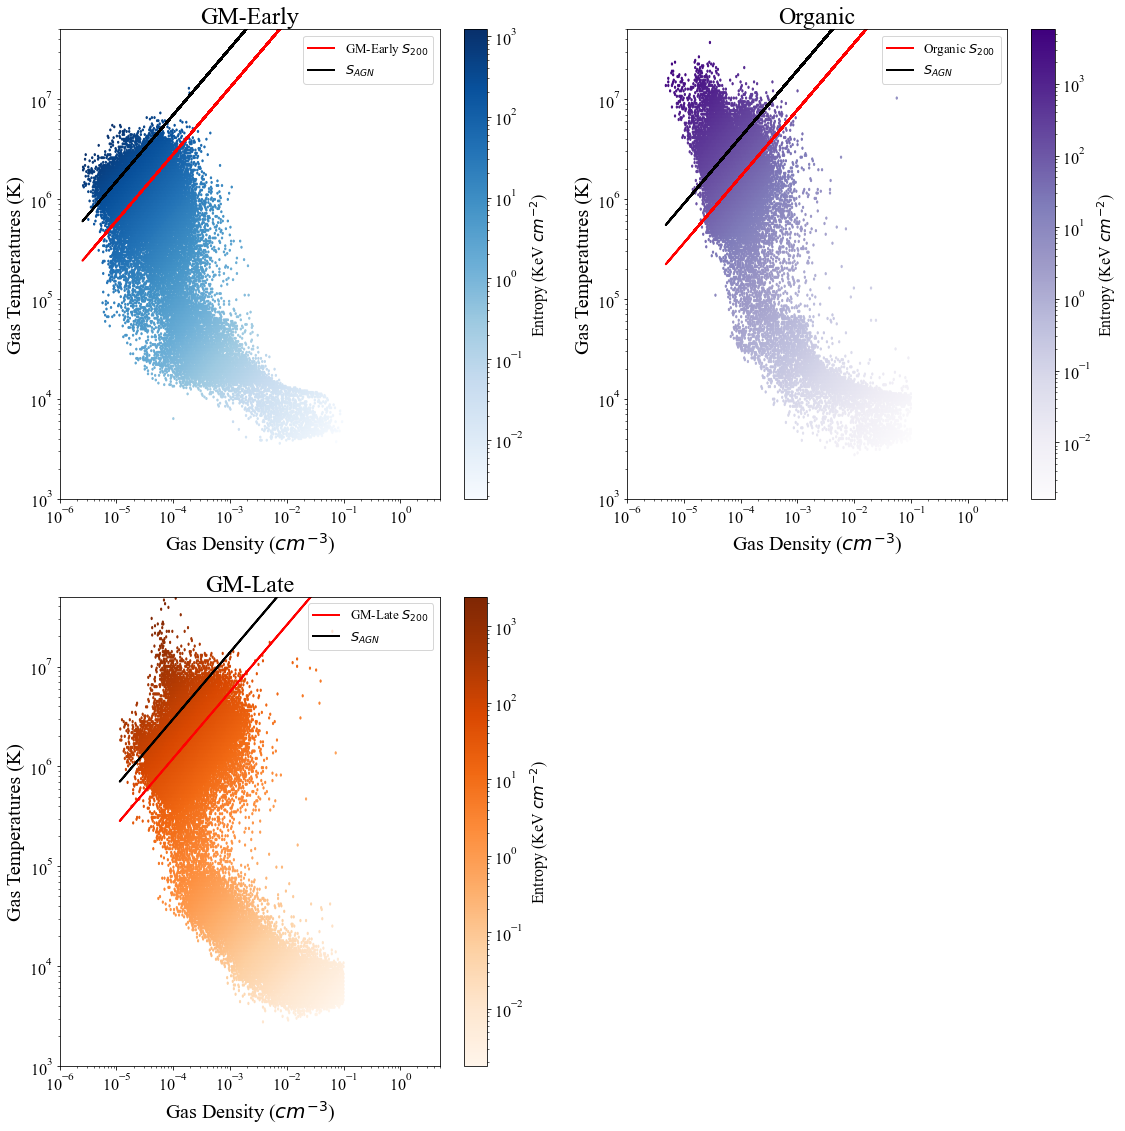

In [26]:
t_agn = 1e9
nh_agn = 0.1e-2

fig, ax = plt.subplots(figsize=(16, 16))

s_200_early_plot = np.ones(len(gas_density_early))
s_200_early_plot = [x * s_200_early for x in s_200_early_plot]
s_200_temp_early_plot = np.ones(len(gas_density_early))
for i in range(0, len(gas_density_early)):
    s_200_temp_early_plot[i] = (s_200_early_plot[i]*1.602e-9/k_boltzmann)*((gas_density_early[i])**(2/3))
    
s_200_organic_plot = np.ones(len(gas_density_organic))
s_200_organic_plot = [x * s_200_organic for x in s_200_organic_plot]
s_200_temp_organic_plot = np.ones(len(gas_density_organic))
for i in range(0, len(gas_density_organic)):
    s_200_temp_organic_plot[i] = (s_200_organic_plot[i]*1.602e-9/k_boltzmann)*((gas_density_organic[i])**(2/3))
    
s_200_late_plot = np.ones(len(gas_density_late))
s_200_late_plot = [x * s_200_late for x in s_200_late_plot]
s_200_temp_late_plot = np.ones(len(gas_density_late))
for i in range(0, len(gas_density_late)):
    s_200_temp_late_plot[i] = (s_200_late_plot[i]*1.602e-9/k_boltzmann)*((gas_density_late[i])**(2/3))
    
s_agn_early_plot = np.ones(len(gas_density_early))
s_agn_early_plot = [x * (t_agn*(k_boltzmann/1.602e-9)/(nh_agn)**2/3) for x in s_200_early_plot]
s_agn_temp_early_plot = np.ones(len(gas_density_early))
for i in range(0, len(gas_density_early)):
    s_agn_temp_early_plot[i] = (s_agn_early_plot[i])*((gas_density_early[i])**(2/3))
    
s_agn_organic_plot = np.ones(len(gas_density_organic))
s_agn_organic_plot = [x * (t_agn*(k_boltzmann/1.602e-9)/(nh_agn)**2/3) for x in s_200_organic_plot]
s_agn_temp_organic_plot = np.ones(len(gas_density_organic))
for i in range(0, len(gas_density_organic)):
    s_agn_temp_organic_plot[i] = (s_agn_organic_plot[i])*((gas_density_organic[i])**(2/3))

s_agn_late_plot = np.ones(len(gas_density_late))
s_agn_late_plot = [x * (t_agn*(k_boltzmann/1.602e-9)/(nh_agn)**2/3) for x in s_200_late_plot]
s_agn_temp_late_plot = np.ones(len(gas_density_late))
for i in range(0, len(gas_density_late)):
    s_agn_temp_late_plot[i] = (s_agn_late_plot[i])*((gas_density_late[i])**(2/3))
#    if s_agn_temp_late_plot[i] == 1:
#        s_agn_temp_late_plot[i] = s_agn_temp_late_plot[i+1]


print(max((s_agn_early_plot))/1.602e-9*k_boltzmann)
print(max((s_agn_organic_plot))/1.602e-9*k_boltzmann)
print(max((s_agn_late_plot))/1.602e-9*k_boltzmann)
print((t_agn/(nh_agn)**2/3)/1.602e-9*k_boltzmann)
print(max(s_200_early_plot))



ax = plt.subplot(2,2,1)
hexplot = ax.hexbin(gas_density_early, gas_temps_early, C = entropy_early_plot, reduce_C_function=np.mean, gridsize=200, bins = 'log', xscale = 'log', yscale = 'log', cmap='Blues', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(gas_density_early, s_200_temp_early_plot, c='red',lw=2,ls='-',label='GM-Early $S_{200}$')
ax.plot(gas_density_early, s_agn_temp_early_plot, c='black',lw=2,ls='-',label='$S_{AGN}$')
plt.title('GM-Early')
plt.xlabel("Gas Density ($cm^{-3}$)")
plt.ylabel("Gas Temperatures (K)")
plt.xlim([1e-6, 5])
plt.ylim([1e3, 5e7])
plt.xscale('log')
plt.yscale('log')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.legend(loc='upper right',prop={'size': 13})

ax = plt.subplot(2,2,2)
hexplot = ax.hexbin(gas_density_organic, gas_temps_organic, C = entropy_organic_plot, reduce_C_function=np.mean, gridsize=200, bins = 'log', xscale = 'log', yscale = 'log', cmap='Purples', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(gas_density_organic, s_200_temp_organic_plot, c='red',lw=2,ls='-',label='Organic $S_{200}$')
ax.plot(gas_density_organic, s_agn_temp_organic_plot, c='black',lw=2,ls='-',label='$S_{AGN}$')
plt.title('Organic')
plt.xlabel("Gas Density ($cm^{-3}$)")
plt.ylabel("Gas Temperatures (K)")
plt.xlim([1e-6, 5])
plt.ylim([1e3, 5e7])
plt.xscale('log')
plt.yscale('log')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.legend(loc='upper right',prop={'size': 13})

ax = plt.subplot(2,2,3)
hexplot = ax.hexbin(gas_density_late, gas_temps_late, C = entropy_late_plot, reduce_C_function=np.mean, gridsize=200, bins = 'log', xscale = 'log', yscale = 'log', cmap='Oranges', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Entropy (KeV $cm^{-2}$)')
ax.plot(gas_density_late, s_200_temp_late_plot, c='red',lw=2,ls='-',label='GM-Late $S_{200}$')
ax.plot(gas_density_late, s_agn_temp_late_plot, c='black',lw=2,ls='-',label='$S_{AGN}$')
plt.title('GM-Late')
plt.xlabel("Gas Density ($cm^{-3}$)")
plt.ylabel("Gas Temperatures (K)")
plt.xlim([1e-6, 5])
plt.ylim([1e3, 5e7])
plt.xscale('log')
plt.yscale('log')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.legend(loc='upper right',prop={'size': 13})

plt.tight_layout()
#plt.savefig('temp_vs_density_entropy_weighted.png')
plt.show()

In [260]:
from IPython.display import display, Markdown
display(Markdown(rf'Minimum GM-Early Gas Density =  ${min(gas_density_early):1.2} cm^{{-3}}$'))
display(Markdown(rf'Maximum GM-Early Gas Density =  ${max(gas_density_early):5.2} cm^{{-3}}$'))
display(Markdown(rf'Minimum GM-Early Gas Temperature =  ${min(gas_temps_early):1.2} K$'))
display(Markdown(rf'Maximum GM-Early Gas Temperature =  ${max(gas_temps_early):5.2} K$'))
display(Markdown(rf'Minimum GM-Early Gas SFR =  ${min(test_sfr_early):1.10} $'))
display(Markdown(rf'Maximum GM-Early Gas SFR =  ${max(test_sfr_early):5.10} $'))
print("\n")

display(Markdown(rf'Minimum Organic Gas Density =  ${min(gas_density_organic):1.2} cm^{{-3}}$'))
display(Markdown(rf'Maximum Organic Gas Density =  ${max(gas_density_organic):5.2} cm^{{-3}}$'))
display(Markdown(rf'Minimum Organic Gas Temperature =  ${min(gas_temps_organic):1.2} K$'))
display(Markdown(rf'Maximum Organic Gas Temperature =  ${max(gas_temps_organic):5.2} K$'))
display(Markdown(rf'Minimum Organic Gas SFR =  ${min(test_sfr_organic):1.10} $'))
display(Markdown(rf'Maximum Organic Gas SFR =  ${max(test_sfr_organic):5.10} $'))
print("\n")

display(Markdown(rf'Minimum GM-Late Gas Density =  ${min(gas_density_late):1.2} cm^{{-3}}$'))
display(Markdown(rf'Maximum GM-Late Gas Density =  ${max(gas_density_late):5.2} cm^{{-3}}$'))
display(Markdown(rf'Minimum GM-Late Gas Temperature =  ${min(gas_temps_late):1.2} K$'))
display(Markdown(rf'Maximum GM-Late Gas Temperature =  ${max(gas_temps_late):5.2} K$'))
display(Markdown(rf'Minimum GM-Late Gas SFR =  ${min(test_sfr_late):1.10} $'))
display(Markdown(rf'Maximum GM-Late Gas SFR =  ${max(test_sfr_late):5.10} $'))

print(min(test_sfr_early))
print(max(test_sfr_early))
print(min(test_sfr_organic))
print(max(test_sfr_organic))
print(min(test_sfr_late))
print(max(test_sfr_late))

Minimum GM-Early Gas Density =  $2.5e-06 cm^{-3}$

Maximum GM-Early Gas Density =  $0.094 cm^{-3}$

Minimum GM-Early Gas Temperature =  $3.6e+03 K$

Maximum GM-Early Gas Temperature =  $1.3e+07 K$

Minimum GM-Early Gas SFR =  $0.0 $

Maximum GM-Early Gas SFR =  $  0.0 $

Minimum Organic Gas Density =  $4.8e-06 cm^{-3}$

Maximum Organic Gas Density =  $  0.1 cm^{-3}$

Minimum Organic Gas Temperature =  $2.8e+03 K$

Maximum Organic Gas Temperature =  $3.7e+07 K$

Minimum Organic Gas SFR =  $0.0 $

Maximum Organic Gas SFR =  $  0.0 $

Minimum GM-Late Gas Density =  $1.1e-05 cm^{-3}$

Maximum GM-Late Gas Density =  $  0.1 cm^{-3}$

Minimum GM-Late Gas Temperature =  $2.8e+03 K$

Maximum GM-Late Gas Temperature =  $4.8e+07 K$

Minimum GM-Late Gas SFR =  $0.0 $

Maximum GM-Late Gas SFR =  $  0.0 $

0.0
0.0
0.0
0.0
0.0
0.0


0.09523962147944114
320.6812271543653


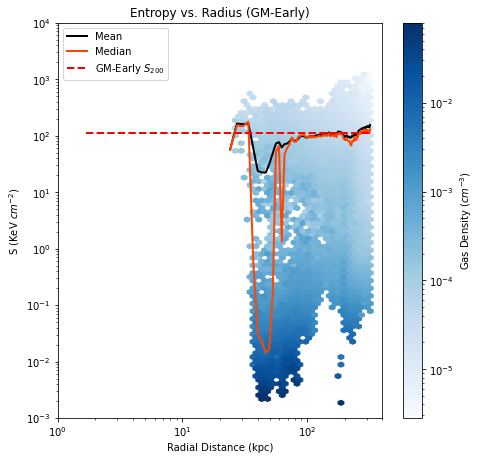

In [307]:
entropy_test = np.ones(len(sfr_early))
entropy_test = gas_temps[0]/(gas_nh[0]**(2/3))
entropy_test = 1.3806e-16*entropy_test
entropy_test = entropy_test/1.602e-9

mask = np.where((sfr_early==0)&(gas_nh[0] < 0.1)&(radial_dist_early <= (r_200[0]/3.085678e24)))
entropy_early = entropy_test[mask]
radial_early_plot = radial_dist_early[mask]
radial_early_plot = [x * 1000 for x in radial_early_plot] #convert to Kpc
print(min(radial_early_plot))
print(max(radial_early_plot))

#mask = np.where(radial_dist_early <= (r_200[0]/3.085678e24))
#radial_early_plot = radial_dist_early[mask]
mean, bin_edges, bin_number = binned_statistic(radial_early_plot, entropy_early, statistic='mean', bins=num_bins)
median, bin_edges, bin_number = binned_statistic(radial_early_plot, entropy_early, statistic='median', bins=num_bins)

# Find the centres of the bins
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.

fig = plt.figure(figsize=(16, 16))

ax = plt.subplot(2,2,1)
hexplot = ax.hexbin(radial_early_plot, entropy_early, C = gas_density_early, reduce_C_function=np.mean, gridsize=75, bins = 'log', xscale = 'log', yscale = 'log', cmap='Blues', edgecolors = 'face')
fig.colorbar(hexplot, orientation='vertical', label = 'Gas Density ($cm^{-3}$)')
ax.plot(bin_centres,mean,c='black',lw=2,ls='-',label='Mean')     # Plot the mean 
ax.plot(bin_centres,median,c='orangered',lw=2,ls='-',label='Median')  # Plot the median 
ax.plot(bin_centres, s_200_early_plot, c='red',lw=2,ls='--',label='GM-Early $S_{200}$')
plt.title('Entropy vs. Radius (GM-Early)')
plt.xlabel("Radial Distance (kpc)")
plt.ylabel("S (KeV $cm^{-2}$)")
plt.xlim([1, 4e2])
plt.ylim([1e-3, 1e4])
plt.xscale('log')
plt.yscale('log')

ax.legend(loc='upper left',prop={'size': 10})
plt.show()